In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
# from generators import BlockDiagonalMatrixGenerator

# n_row, n_col, k, seed = 300, 500, 5, None

# data = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=[0.2, 0.1, 0.2, 0.1])
# data.generate(seed=seed) # if no seed assigned, use time instead

# data.show_matrix(title="gen_diag_sorted")

In [3]:
from datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

# idx = data.sample(factor_id=0, n_samples=300)
# idx = data.sample(factor_id=1, n_samples=500)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


In [4]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 7527
[I]   val_size     : 1076
[I]   test_size    : 2151
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 10754
[I]   train_size   : 7527
[I]   val_size     : 1076
[I]   test_size    : 2151
[I]   seed         : 2023


In [5]:
# shared params
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

k = 50

# 1. Init with `NMFSklearn`

[I] k            : 50
[I] U            : None
[I] V            : None
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] init_method  : nndsvd
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] beta_loss    : frobenius
[I] solver       : mu
[I] Missing validation data.
[W] Missing testing data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\sklearn\decomposition\_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


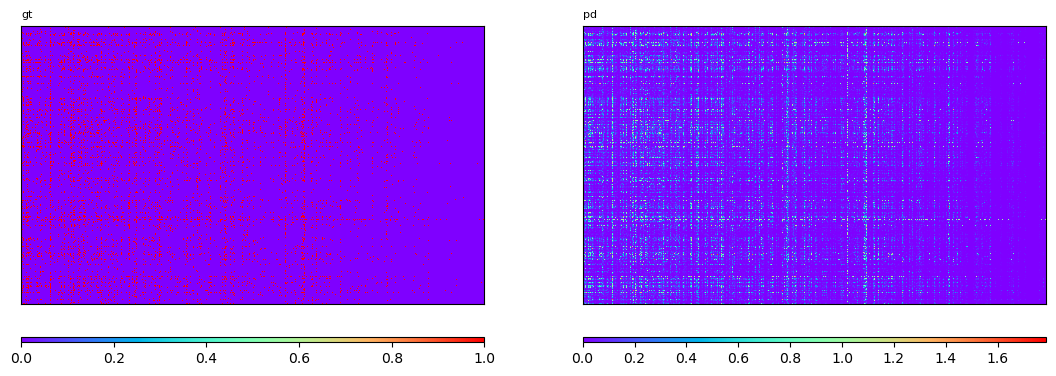

In [6]:
from models import NMFSklearn

model_nmf = NMFSklearn(k=k, solver='mu', init_method='nndsvd', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train)

U, V = model_nmf.U, model_nmf.V

# 2. Init with `NMF` + `BinaryMFPenalty`

In [7]:
# reg = 1
# reg_growth = 3

# model_bmf = BinaryMFPenalty(k=k, U=U, V=V, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=100, seed=2024)
# model_bmf.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)

# U, V = model_bmf.U, model_bmf.V

# 3. `BinaryMFThresholdExColumnwise` (Wolfe line search)

[I] k            : 50
[I] U            : (300, 50)
[I] V            : (500, 50)
[I] W            : full
[I] min_diff     : 0.0
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 1714679447
[I] verbose      : False
[I] display      : False
[I] us           : 0.1
[I] vs           : 0.1
[I] lamda        : 10
[I] solver       : line-search
[I] task         : reconstruction
[I] verbose      : True
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized U: [0.0, 3.193144902693179] -> [0.0, 1.0], V: [0.0, 5.70677567959554] -> [0.0, 1.0]
[I] iter: 1
[I] [I] Wolfe line search for iter   : 1
[I]     num of function evals made   : 25
[I]     num of gradient evals made   : 3
[I]     function value update        : 2228820.115 -> 4510.815
[I]     threshold update             :
[I]         [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.

\
                              
                  time iter   
0    03/05/24 03:50:47    0   
1    03/05/24 03:50:48    1   
2    03/05/24 03:50:48    2   
3    03/05/24 03:50:48    3   
4    03/05/24 03:50:48    4   
..                 ...  ...   
97   03/05/24 03:51:08   97   
98   03/05/24 03:51:08   98   
99   03/05/24 03:51:09   99   
100  03/05/24 03:51:09  100   
101  03/05/24 03:51:09  101   

                                                        \
                                                         
                                                    us   
0    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...   
1    [0.29307098631542905, 0.35304012505095406, 0.3...   
2    [0.5478215719028467, 0.6490031243371317, 0.591...   
3    [0.3652630299349463, 0.49019256257487276, 0.48...   
4    [0.556250293802995, 0.3904382919902718, 0.4293...   
..                                                 ...   
97   [0.45419970363431034, 0.4105716003913072, 0.44...   
98   [0.4541757033258617, 0.4105440917894629, 0.448...   
99   [0.45420737077869244, 0.41058018342795677, 0.4...   
100  [0.4541873019710601, 0.4105572169316961, 0.448...   
101  [0.45423649773175584, 0.4106127452169035, 0.44...   

                                                                      \
                                                                       
                                                    vs             F   
0    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...  2.228820e+06   
1    [0.4437212960938729, 0.3669488440091728, 0.360...  4.510815e+03   
2    [0.7781520334347809, 0.5844360410759074, 0.617...  2.347395e+03   
3    [0.47787561079947033, 0.4848148199087061, 0.46...  2.001412e+03   
4    [0.6325193082778449, 0.43089264620703793, 0.40...  1.982219e+03   
..                                                 ...           ...   
97   [0.5612999734475684, 0.4694697016247919, 0.429...  1.946989e+03   
98   [0.5612677259375538, 0.4694528086815271, 0.429...  1.946989e+03   
99   [0.5613086953308521, 0.4694735176832346, 0.429...  1.946989e+03   
100  [0.5612819755546498, 0.4694596425764481, 0.429...  1.946988e+03   
101  [0.5613414589887248, 0.46948767952782355, 0.42...  1.946988e+03   

        train                                
            0                                
       Recall Precision  Accuracy        F1  
0    0.926133  0.223594  0.834920  0.360221  
1    0.523316  0.679607  0.963700  0.591308  
2    0.273416  0.936732  0.962613  0.423283  
3    0.396705  0.822363  0.965427  0.535221  
4    0.406404  0.812915  0.965520  0.541895  
..        ...       ...       ...       ...  
97   0.394181  0.827154  0.965467  0.533921  
98   0.394181  0.827154  0.965467  0.533921  
99   0.394181  0.827154  0.965467  0.533921  
100  0.394181  0.827154  0.965467  0.533921  
101  0.394181  0.827154  0.965467  0.533921  

[102 rows x 9 columns]

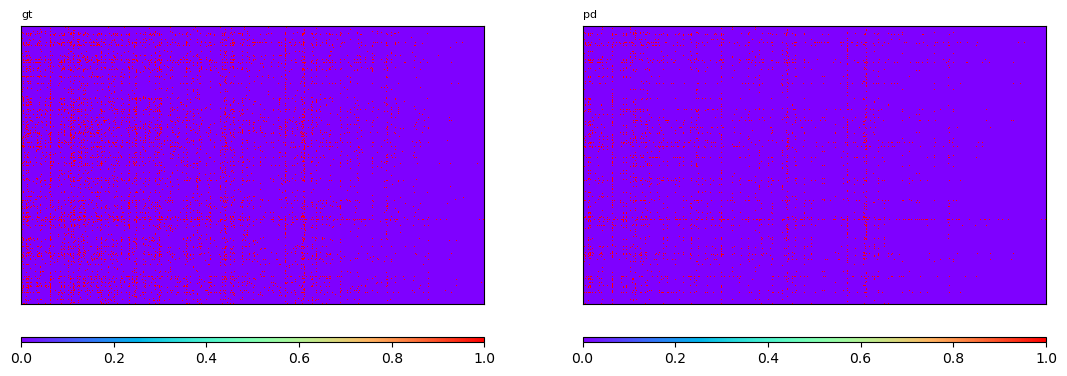

In [8]:
from models import BinaryMFThresholdExColumnwise

us, vs = 0.1, 0.1
W = 'full'
init_method = 'custom'
min_diff = 0.0
max_iter = 100
lamda = 10

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

model = BinaryMFThresholdExColumnwise(k=k, U=U, V=V, us=us, vs=vs, W=W, lamda=lamda, min_diff=min_diff, max_iter=max_iter, init_method=init_method)
model.fit(X_train=X_train, task='reconstruction', verbose=True, display=False)

# 4. `BinaryMFThresholdExColumnwise` (coordinate descent)

[I] k            : 50
[I] U            : (300, 50)
[I] V            : (500, 50)
[I] W            : full
[I] min_diff     : 0.0
[I] max_iter     : 1000
[I] init_method  : custom
[I] seed         : 1714678884
[I] verbose      : False
[I] display      : False
[I] us           : 0.1
[I] vs           : 0.1
[I] lamda        : 10
[I] solver       : cd
[I] task         : reconstruction
[I] verbose      : True
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized U: [0.0, 1.0] -> [0.0, 1.0], V: [0.0, 1.0] -> [0.0, 1.0]


 95%|█████████▍| 0.9499172546260745/1.0 [01:12<00:03, 76.25s/it]   

[W] Stopped in advance: Reach maximum iteration


\
                                
                   time  iter   
0     03/05/24 03:41:24     1   
1     03/05/24 03:41:24     2   
2     03/05/24 03:41:24     3   
3     03/05/24 03:41:24     4   
4     03/05/24 03:41:25     5   
...                 ...   ...   
996   03/05/24 03:42:36   997   
997   03/05/24 03:42:36   998   
998   03/05/24 03:42:36   999   
999   03/05/24 03:42:36  1000   
1000  03/05/24 03:42:37  1001   

                                                         \
                                                          
                                                     us   
0     [0.10030485244755719, 0.10030947633157317, 0.1...   
1     [0.1006086496335472, 0.10061783465255018, 0.10...   
2     [0.1009113997555343, 0.10092508380962306, 0.10...   
3     [0.10121311091391787, 0.10123123254219228, 0.1...   
4     [0.10151379111347761, 0.10153628948411406, 0.1...   
...                                                 ...   
996   [0.2416423880874212, 0.23780344999639527, 0.23...   
997   [0.24172657464872213, 0.2378805951867615, 0.23...   
998   [0.24181071279326066, 0.23795768856092947, 0.2...   
999   [0.24189480259466445, 0.23803473019596058, 0.2...   
1000  [0.2419788441263899, 0.23811172016873824, 0.23...   

                                                                       \
                                                                        
                                                     vs             F   
0     [0.1002694625494325, 0.10027895905305265, 0.10...  2.214701e+06   
1     [0.1005380239831171, 0.10055697402217037, 0.10...  2.200711e+06   
2     [0.10080569075013358, 0.10083405182726635, 0.1...  2.186849e+06   
3     [0.10107246922902591, 0.10111019931078136, 0.1...  2.173114e+06   
4     [0.10133836572883805, 0.10138542323884811, 0.1...  2.159503e+06   
...                                                 ...           ...   
996   [0.22246257353965734, 0.227319766908466, 0.230...  1.030281e+05   
997   [0.2225308945186628, 0.2273919655326911, 0.230...  1.028475e+05   
998   [0.22259916843533895, 0.2274641166464916, 0.23...  1.026674e+05   
999   [0.22266739536001595, 0.22753622032101595, 0.2...  1.024877e+05   
1000  [0.2227355753628635, 0.22760827662724872, 0.23...  1.023085e+05   

         train                                
             0                                
        Recall Precision  Accuracy        F1  
0     0.926000  0.223857  0.835180  0.360551  
1     0.925468  0.224768  0.836087  0.361692  
2     0.925335  0.225142  0.836447  0.362166  
3     0.925203  0.225635  0.836913  0.362793  
4     0.924538  0.227070  0.838293  0.364594  
...        ...       ...       ...       ...  
996   0.702538  0.487104  0.947953  0.575314  
997   0.702538  0.487104  0.947953  0.575314  
998   0.702006  0.487499  0.948013  0.575411  
999   0.701608  0.488348  0.948140  0.575868  
1000  0.701608  0.488348  0.948140  0.575868  

[1001 rows x 9 columns]

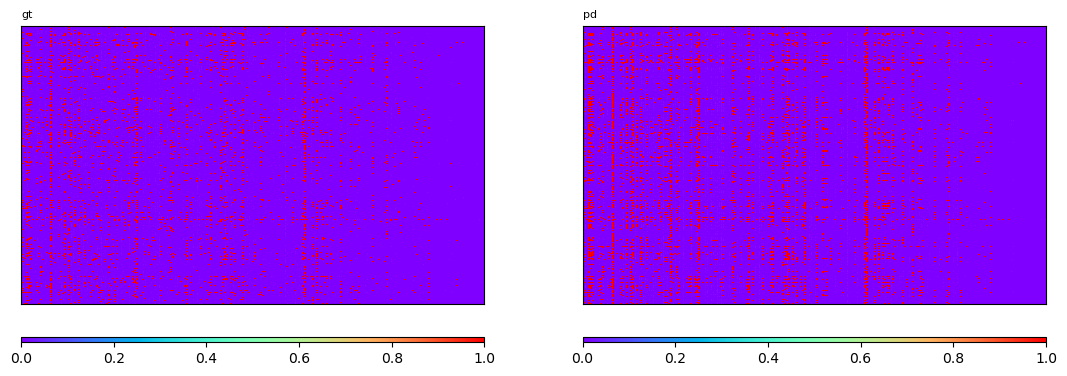

In [36]:
from models import BinaryMFThresholdExColumnwise

us, vs = 0.1, 0.1
W = 'full'
init_method = 'custom'
min_diff = 0.0
max_iter = 1000
lamda = 10

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

model = BinaryMFThresholdExColumnwise(k=k, U=U, V=V, us=us, vs=vs, W=W, lamda=lamda, min_diff=min_diff, max_iter=max_iter, init_method=init_method, solver='cd')
model.fit(X_train=X_train, task='reconstruction', verbose=True, display=False)

In [37]:
model.us

[0.2419788441263899,
 0.23811172016873824,
 0.23189126733984755,
 0.21750917437106118,
 0.2426390759471417,
 0.23023314286044422,
 0.2345280339331508,
 0.2230997476425253,
 0.2305937926437356,
 0.22669571340715625,
 0.21921238105796315,
 0.2195286195523778,
 0.22284817912613897,
 0.22702398021010323,
 0.22284034753233176,
 0.22217788539052827,
 0.2375042017002035,
 0.22933260196423264,
 0.23615021219947105,
 0.22422955945328651,
 0.22550273756020406,
 0.23261310627174664,
 0.23028015280635308,
 0.22173513737160774,
 0.2210615659956898,
 0.22819175433750835,
 0.22445698191002467,
 0.22149553848435818,
 0.22121419970839923,
 0.2378422097827841,
 0.23090885494785568,
 0.22954319475603174,
 0.2224107201561022,
 0.222898574787724,
 0.22040596857829267,
 0.22738760590976537,
 0.23407149198078864,
 0.2199984169649698,
 0.2328716851008745,
 0.22932104525419553,
 0.2229939563487403,
 0.21986862501280122,
 0.21937509431763746,
 0.23015742351563614,
 0.22348306870840612,
 0.22668380953877398,
 0.

# a. Visualize F

In [20]:
# from mpl_toolkits import mplot3d
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# from tqdm import tqdm

# N = 10
# dpi = 1000

In [21]:
# x = np.linspace(-1.1, 2.1, N)
# y = np.linspace(-1.1, 2.1, N)
# Z = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         params = [X[i, j]] * k + [Y[i, j]] * k
#         Z[i, j] = model.F(params)
        
# # fig = plt.figure(dpi=dpi)
# # ax = plt.axes(projection='3d')
# # ax.contour3D(X, Y, Z, 50, cmap='hot')
# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # ax.set_zlabel('z')

# levels = np.logspace(0, 10, num=100, endpoint=True, base=10)
# levels = (levels - levels.min()) / (levels.max() - levels.min())
# levels = levels * (Z.max() - Z.min()) + Z.min()

# plt.figure(dpi=dpi)
# cp = plt.contour(X, Y, Z, levels=levels)
# plt.clabel(cp, inline=1, fontsize=10)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

# b. Visualize dF

In [22]:
# x = np.linspace(0.0, 1.2, N)
# y = np.linspace(0.0, 1.2, N)
# dx = np.zeros([N, N])
# dy = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         dx[i, j], dy[i, j] = model.dF([X[i, j], Y[i, j]])

#         # re-scale
#         k = 6 / np.sqrt(dx[i, j]**2 + dy[i, j]**2)
#         dx[i, j] *= k
#         dy[i, j] *= k

# plt.figure(dpi=dpi) 
# fig = plt.quiver(X, Y, dx, dy)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()